In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

dataset = pd.read_csv('dataclean.csv', sep=',')

print(dataset.keys())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')


In [7]:
dataframe = pd.DataFrame(dataset)
dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [8]:
dataframe = dataframe.replace('?', np.nan)
dataframe = dataframe.dropna()
dataframe.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [9]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = dataframe.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

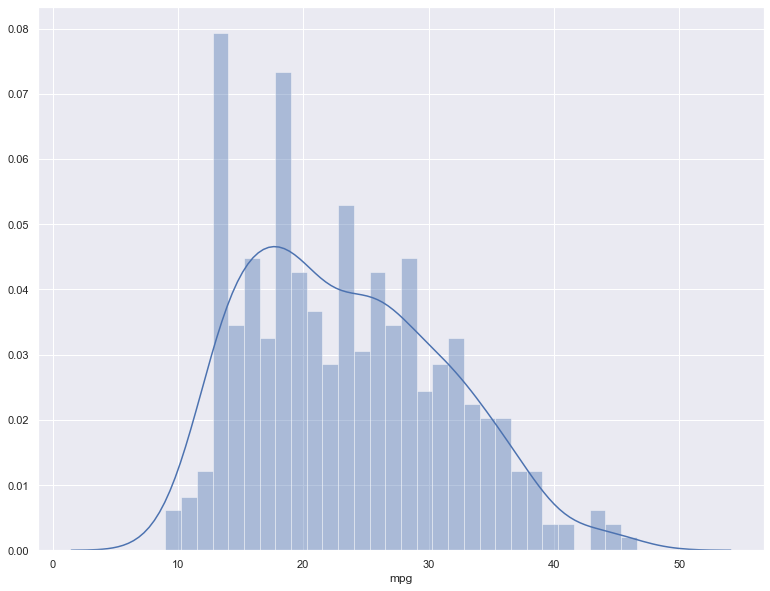

In [10]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(dataframe['mpg'], bins=30)
plt.show()

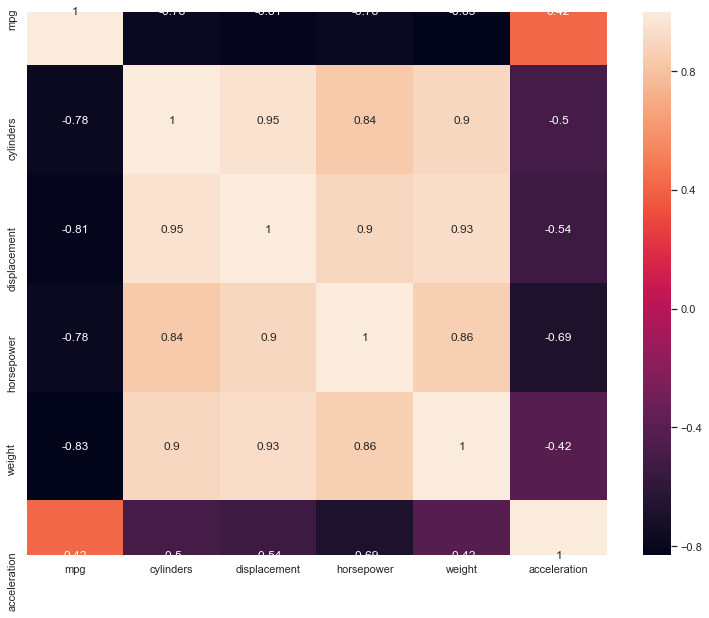

In [11]:
feature_corr = dataframe.corr().round(2)
sns.heatmap(data=feature_corr, annot=True)

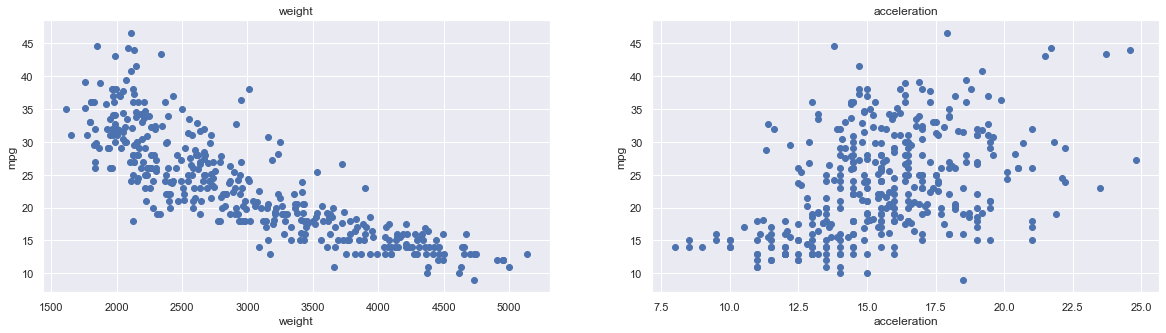

In [12]:
plt.figure(figsize=(20, 5))

target = dataframe['mpg']

selected_features = ['weight', 'acceleration']

for i, col in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    x = dataframe[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mpg')

In [13]:
X = pd.DataFrame(np.c_[dataframe['weight'], dataframe['acceleration']], columns = ['weight','acceleration'])
Y = dataframe['mpg']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [31]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mse(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("Training : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

Y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mse(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("Testing : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

Training : 
RMSE :  4.215211695253154
R2 :  0.7058502680675424


Testing : 
RMSE :  4.497042162949399
R2 :  0.6746313929380414




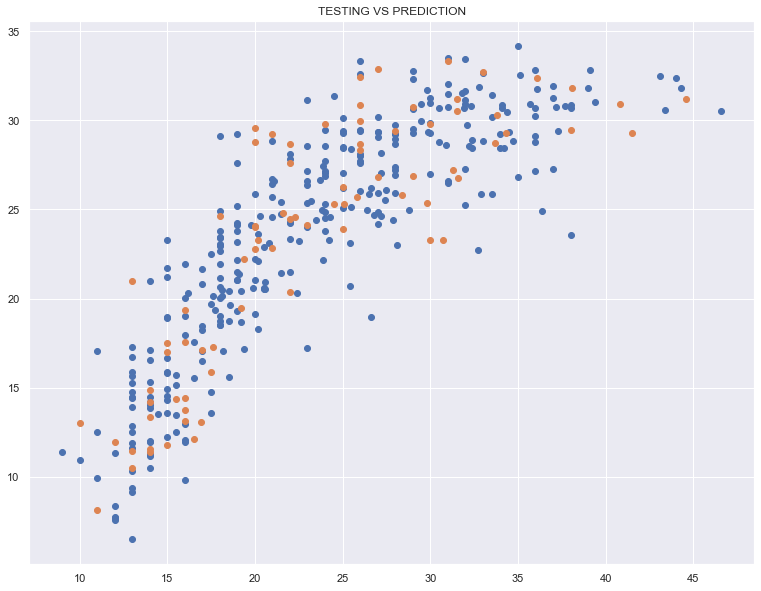

In [38]:
plt.scatter(Y_train, Y_train_predict)
plt.scatter(Y_test, Y_test_predict)
plt.title('TESTING VS PREDICTION')
plt.show()